<a href="https://colab.research.google.com/github/whdms2008/FarmSecurity/blob/main/Team_AI/All/FarmSecurity_ipynb/220718/farmSecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 참고 사이트 목록

전체적 설명 관련 참고 사이트
https://velog.io/@jhlee508/Object-Detection-YOLOv4-Darknet-%ED%95%99%EC%8A%B5%ED%95%98%EC%97%AC-Custom-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%9D%B8%EC%8B%9D-%EB%AA%A8%EB%8D%B8-%EB%A7%8C%EB%93%A4%EA%B8%B0-feat.-AlexeyABdarknet

코드 관련 참고 사이트
https://colab.research.google.com/drive/1_GdoqCJWXsChrOiY8sZMr_zbr_fH-0Fg?usp=sharing#scrollTo=fGKcGR_kZAU7

경로 관련 참고 사이트
https://velog.io/@jhlee508/Object-Detection-YOLOv4-Darknet-%ED%95%99%EC%8A%B5%ED%95%98%EC%97%AC-Custom-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%9D%B8%EC%8B%9D-%EB%AA%A8%EB%8D%B8-%EB%A7%8C%EB%93%A4%EA%B8%B0-feat.-AlexeyABdarknet

학습 관련 참고 사이트 https://m.blog.naver.com/bigdata-pro/221781790878

# Driver 연결

## 초기 디렉터리 연결시 사용

In [ ]:
# 초기 디렉터리 연결시 사용
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 갑자기 디렉토리 사용불가능 할 때 사용

In [ ]:
#갑자기 디렉토리 사용불가능 할 때 사용
import os
path = "/content" 
os.chdir(path)

## remount해야할 때 사용

In [ ]:
#remount해야할 때 사용
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 경로 이동 & darknet 다운로드

## 경로 이동

- 먼저 아래 코드 실행 전에 /content/drive/MyDrive 안에 yolov4 폴더를 직접 생성한 후 아래 코드 블럭 실행할 것

In [ ]:
%cd /content/drive/MyDrive/yolov4/

/content/drive/MyDrive/yolov4


## darknet 다운로드

yolov4 폴더에 darknet 설치

In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git /content/drive/MyDrive/yolov4/

Cloning into '/content/drive/MyDrive/yolov4'...
remote: Enumerating objects: 15460, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 15460 (delta 6), reused 22 (delta 2), pack-reused 15424
Receiving objects: 100% (15460/15460), 14.11 MiB | 7.48 MiB/s, done.
Resolving deltas: 100% (10369/10369), done.
Checking out files: 100% (2053/2053), done.


# Make 파일 생성 및 수정

## 생성 및 수정

In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd /content/drive/MyDrive/yolov4/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/drive/MyDrive/yolov4


## GPU 버전 확인 (설치 확인)

In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


## make 실행

In [ ]:
!make

# 사전 작업

yolov4.conv.137<br>
yolov4-custom.cfg<br>
yolov4-obj.cfg<br><br>

파일 미리 다운로드 또는 생성하여 대입되어야 되는 경로에 대입할 것<br>
상세 설명은 아래 텍스트 셀을 보면서 참고할 것

###  yolov4.conv.137 파일

1. Pre-trained Weight 파일에 해당<br>
@ 아래 사이트에서 다운로드 할 것<br>
> https://drive.google.com/open?id=1JKF-bdIklxOOVy-2Cr5qdvjgGpmGfcbp


2. 다운로드 후 아래 경로에 저장할 것<br>
@ darknet/build/darknet/x64 경로 내에 둔다.<br>
> ex) /content/drive/MyDrive/yolov4/build/darknet/x64/yolov4.conv.137

### cfg 파일 설정하기

configure 파일을 설정하는 단계

1. darknet/cfg/yolov4-custom.cfg and  darknet/cfg/yolov4-obj.cfg

    Clone 받은 darket 파일에서 위 경로 내에 있는 yolov4-custom.cfg 라는 이름의 cfg 파일을 통째로 복사하여<br> yolov4-obj.cfg 라는 이름으로 같은 경로 내에 복사본을 생성한다.<br>
    yolov4-obj.cfg 라는 이름의 빈 파일을 먼저 생성하고 yolov4-custom.cfg 파일의 내용을 복사해도 된다.<br><br>

    즉, 파일 구조는 아래와 같다.<br>

        darknet
        ㄴ cfg
        ㄴ yolov4-custom.cfg
        ㄴ yolov4-obj.cfg
        ㄴ ...
        ㄴ ...


2. yolov4-obj.cfg 파일 및 yolov4-custom.cfg 파일 내용을 수정

    - 6번째 line을 batch=64로 수정<br>
    - 7번째 line을 subdivision=16로 수정<br>
    - 20번째 line을 max_batches={클래수 개수*2000}로 수정<br>
    ex) 만약 클래스의 개수가 2개라면 max_batches=4000<br>
    - 22번째 line을 steps={클래스 개수*2000*0.80},{클래스 개수*2000*0.90}로 수정<br>
    ex) 만약 클래스 개수가 2개라면 steps=3200,3600<br>
    - 8번째, 9번째 line을 원하는 네트워크 input size로 수정<br>
    ex) 416x416 크기의 이미지를 입력하려면 width=416, height=416 (32의 배수로 설정하는 것을 권장)<br>
    - [yolo] layer에 해당하는 970번째, 1058번째, 1146번째 3개의 line을 모두 classes={클래스 개수}로 수정<br>
    ex) 만약 클래스의 개수가 2개라면 classes=2<br>
    - 3개의 [yolo] layer 직전의 [convolution] layer의 해당하는 963번째, 1051번째, 1139번째 line을 모두 filters={(클래수 개수 + 5) x 3}로 수정<br>
    ex) 만약 클래스의 개수가 2개라면 filters=21


# 이미지와 라벨링 파일 저장하기

전체 이미지 파일과 라벨링 파일을 모두 /content/drive/MyDrive/yolov4/build/darknet/x64/data/obj 경로에 넣어준다.<br> obj 폴더가 /content/drive/MyDrive/yolov4/build/darknet/x64/data 경로 내에 없다면 obj 폴더 생성 후 파일들을 집어 넣어준다.<br>

ex)<br>

    darknet
    ㄴ build
    ㄴ darknet
        ㄴ x64
            ㄴ data
                ㄴ obj
                ㄴ img1.jpg
                ㄴ img1.txt
                ㄴ img2.jpg
                ㄴ img2.txt
                ㄴ ...

<주의><br> 이미지 파일과 라벨링 파일의 이름은 둘이 일치하기만 하다면 어떻게 설정하든지 상관없다.<br> 또한 train 이미지와 valid 이미지 모두 darknet/build/darknet/x64/data/obj/ 경로 내에 넣어주면 된다.

# 필요 사용자 정의 함수

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

def makefile():
  import random as rd
  import os

  files = os.listdir('data/farm')
  rd.shuffle(files)

  files = ['/data/farm/'+i for i in files]

  len(files)

  #f = open("data/train.txt", 'w',encoding='UTF-8')
  f1 = open("data/validation.txt", 'w',encoding='UTF-8')
  count = 0
  for file in files:
      if file.split('.')[-1] =='txt':
          pass
      else:
          if count > len(files)*0.4:
              f1.write(file+'\n')
          count +=1

  #f.close()
  f1.close()

# train.txt, valid.txt 파일 생성 및 저장하기
이미지의 경로가 지정되어 있는 train.txt 파일과 test.txt 파일을 생성하고 저장하는 단계이다.<br> 각각의 파일은 학습과 검증에 사용될 이미지의 상대 혹은 절대 경로를 저장하고 있다.<br>

여러 방법이 있겠지만 아래의 방법을 따라하면 쉽게 진행할 수 있다.<br><br>

## 1st
먼저, glob 라이브러리를 활용하여 경로를 이전에 저장한 이미지들의 경로를 리스트 형태로 생성한다.<br> 아래의 코드에서 이미지 경로 설정에 주의한다.

In [ ]:
#사진들은 다 /darknet/build/darknet/x64/data/obj에 저장하고
#아래는 저장된 사진들의 갯수를 가져옴
from glob import glob

img_list = glob('/content/drive/MyDrive/yolov4/build/darknet/x64/data/obj/*.jpg')

len(img_list)

100

## 2nd
다음, sklearn 라이브러리의 train_test_split 함수를 사용하여 학습과 검증에 사용할 이미지를 분할한다.

In [ ]:
#가져온 사진을 토대로 train, test set 나누기
from sklearn.model_selection import train_test_split

train_img_list, test_img_list = train_test_split(img_list, test_size=0.1, random_state=42) # random_state는 임의로 선택

print(len(train_img_list), len(test_img_list))

90 10


## 3rd
이제 학습 이미지 리스트와 검증 이미지 리스트를 각각 train.txt와 test.txt 파일에 저장한다.<br> 각각의 txt 파일의 경로는 darknet/build/darknet/x64/data/ 경로 아래에 둔다.<br> 경로 설정에 주의한다.<br><br>

ex) 즉, train.txt와 test.txt의 파일의 내용은 예를 들어 아래와 같이 구성된다.<br>
    /content/drive/MyDrive/yolov4/build/darknet/x64/data/obj/img1.jpg<br>
    /content/drive/MyDrive/yolov4/build/darknet/x64/data/obj/img2.jpg<br>
    /content/drive/MyDrive/yolov4/build/darknet/x64/data/obj/img3.jpg<br>
    ...

In [ ]:
#나눠진 set들을 train.txt, test.txt에 경로, 이름 저장
with open('/content/drive/MyDrive/yolov4/build/darknet/x64/data/train.txt', 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')

with open('/content/drive/MyDrive/yolov4/build/darknet/x64/data/test.txt', 'w') as f:
    f.write('\n'.join(test_img_list) + '\n')

## 현재 경로 확인

In [ ]:
!pwd

/content/drive/MyDrive/yolov4


# 데이터 파일 생성하기

이제 학습을 하기 위한 데이터들의 관한 정보를 담고 있는 obj.names, obj.data 파일 2개를 만드는 단계이다.

## 1st
/content/drive/MyDrive/yolov4/build/darknet/x64/data/ 경로 아래에 obj.names 라는 파일을 생성한다.<br>
obj.names 파일에는 모든 클래스의 이름이 들어간다.<br><br>

ex) 만약 클래스의 개수가 2개이고 각각, dog 와 cat이라면, obj.names 파일의 내용은 아래와 같이 구성된다.

    dog
    cat

## 2nd
/content/drive/MyDrive/yolov4/build/darknet/x64/data/ 경로 아래에 obj.data 라는 파일을 생성한다.<br>

obj.data 파일의 내용은<br>
1) 클래스의 개수,<br>
2) train.txt 파일 경로,<br>
3) test.txt 파일 경로,<br>
4) obj.names 파일 경로,<br>
5) 학습된 weight 파일을 백업할(저장할) 경로<br>
총 5가지 line으로 구성된다.<br><br>

ex) 즉, obj.data 파일의 내용은 아래와 같이 구성된다.<br>

classes = 2<br>
train = data/train.txt<br>
valid = data/test.txt<br>
names = data/obj.names<br>
backup = backup

## 주의사항

위 파일의 경로 설정에 매우 주의하도록 한다.<br> 학습 시 train.txt , test.txt 나 obj.names 파일을 찾지 못하는 오류가 발생한다면<br> 상대 경로 말고 절대 경로로 지정해도 된다.<br><br>

절대 경로로 지정시 obj.data의 내용은 아래와 같이 된다.<br>

classes = 2<br>
train = /content/drive/MyDrive/yolov4/build/darknet/x64/data/train.txt<br>
valid = /content/drive/MyDrive/yolov4/build/darknet/x64/data/test.txt<br>
names = /content/drive/MyDrive/yolov4/build/darknet/x64/data/obj.names<br>
backup = /content/drive/MyDrive/yolov4/build/darknet/x64/backup<br>

# 훈련(train)

## 현재 경로 확인

In [ ]:
!pwd

/content/drive/MyDrive/yolov4


## 권한 에러 발생시 시행

In [ ]:
#권한 에러 발생시 실행
!chmod +x ./darknet

## 훈련 실행 코드

- !./darknet detector train {obj.data 경로} {yolov4-obj.cfg 경로} {yolov4.conv.137 경로} -dont_show
- 상대 경로보다는 절대 경로로 하는 것이 에러가 발생하지 않음
- error message를 확인하지 않으려면 위와 같이 -dont_show 옵션을 입력하는 것이 좋다.
-map 옵션을 입력하여 학습 그래프를 확인해볼 수도 있다

### 초기 학습 시

In [ ]:
!./darknet detector train /content/drive/MyDrive/yolov4/build/darknet/x64/data/obj.data /content/drive/MyDrive/yolov4/build/darknet/x64/cfg/yolov4-custom.cfg /content/drive/MyDrive/yolov4/build/darknet/x64/yolov4.conv.137 -dont_show

### 초기 train 중 멈추거나 끊겼을 경우

아래 코드 통해 이어서 진행

- 초기 훈련 코드 블락에 있던 /content/drive/MyDrive/yolov4/build/darknet/x64/yolov4.conv.137 자리가 /content/drive/MyDrive/yolov4/build/darknet/x64/backup/yolov4-custom_last.weights로 변경됨
- 초기 훈련 실행시 /content/drive/MyDrive/yolov4/build/darknet/x64/backup 안에 여러 weights 확장자 파일이 만들어지게 됨. 그 중 yolov4-custom_last.weights의 경로를 가져오면 됨

In [ ]:
!./darknet detector train /content/drive/MyDrive/yolov4/build/darknet/x64/data/obj.data /content/drive/MyDrive/yolov4/build/darknet/x64/cfg/yolov4-custom.cfg /content/drive/MyDrive/yolov4/build/darknet/x64/backup/yolov4-custom_last.weights -dont_show

# 발생 가능 에러 및 처리

> couldn't open file: train.txt
> 참고 링크 : https://github.com/pjreddie/darknet/issues/484

obj.data 파일에서 기존 형태는

classes = 2<br>
train = data/train.txt<br>
valid = data/test.txt<br>
names = data/obj.names<br>
backup = backup/<br>

일 것이다.<br> 이 상태에서 룬련 코드를 실행했을 때, couldn't open file: train.txt와 같은 에러가 뜬다면<br> 상대 경로가 아닌 절대 경로를 대입해주어야 한다.<br>기왕 하는 것 train.txt 관련만 수정하지 말고 모두 수정해주면 좋을 것이다.
<br> 그리고 backup = backup/에서 /는 없애는 것이 좋다.
수정한 코드는 다음과 같다.

classes = 2<br>
train = /content/drive/MyDrive/yolov4/build/darknet/x64/data/train.txt<br>
valid = /content/drive/MyDrive/yolov4/build/darknet/x64/data/test.txt<br>
names = /content/drive/MyDrive/yolov4/build/darknet/x64/data/obj.names<br>
backup = /content/drive/MyDrive/yolov4/build/darknet/x64/backup<br>

# 실험(test)

## 경로 확인

In [ ]:
!pwd

## 권한

In [ ]:
!chmod +x ./darknet

## 실험 실행 코드

### 실험 실행
- 실험 실행 코드 : !./darknet detector test {obj.data 경로} {yolov4-obj.cfg 경로} {학습된 weight 파일 경로} {테스트 이미지 파일 경로}
- 코드 실행 결과로 predictions.jpg 파일이 생성된다.
- 실험 실행 코드를 실행하기에 없어 테스트 이미지를 넣기 위한 폴더를 생성해야 함
- 해당 폴더는 /content/drive/MyDrive/yolov4/build/darknet/x64/data에 생성할 것
- 여기서는 farm 폴더로 생성했고 절대 경로는 /content/drive/MyDrive/yolov4/build/darknet/x64/data/farm 이다.
- 또 test하고자 하는 이미지를 farm 폴더 안에 넣어준다.

In [ ]:
!./darknet detector test /content/drive/MyDrive/yolov4/build/darknet/x64/data/obj.data /content/drive/MyDrive/yolov4/build/darknet/x64/cfg/yolov4-custom.cfg /content/drive/MyDrive/yolov4/build/darknet/x64/backup/yolov4-custom_last.weights /content/drive/MyDrive/yolov4/build/darknet/x64/data/farm/bird_02.jpg

### 실험한 이미지 확인

- 위 실험 코드를 실행하면 predictions.jpg 라는 이미지 파일이 생성
- 해당 이미지의 경로는 /content/drive/MyDrive/yolov4 에 있음

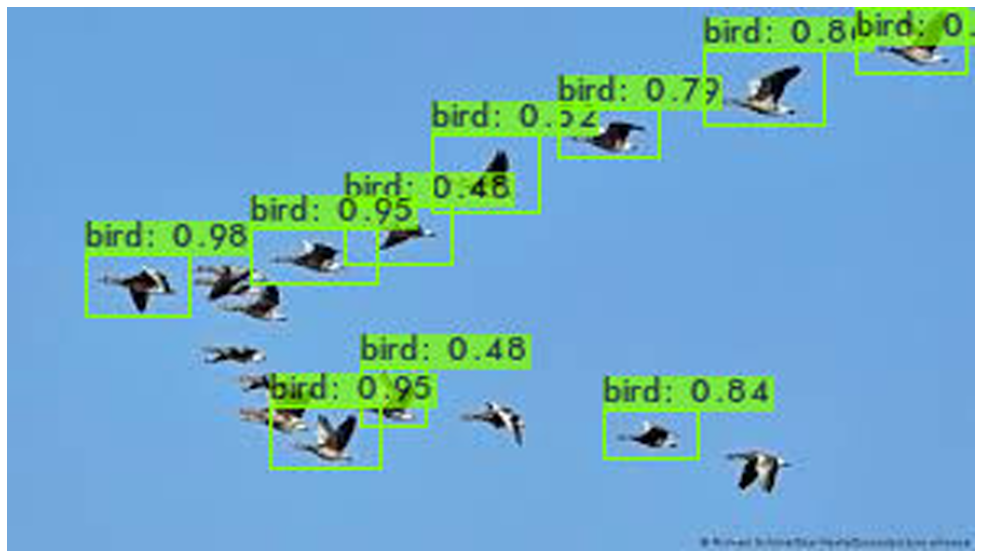

In [ ]:
imShow('predictions.jpg')

### 실험 차트 확인
- 실험 차트는 chart_yolov4-custom.png 임
- 해당 이미지 경로 역시 /content/drive/MyDrive/yolov4에 있음

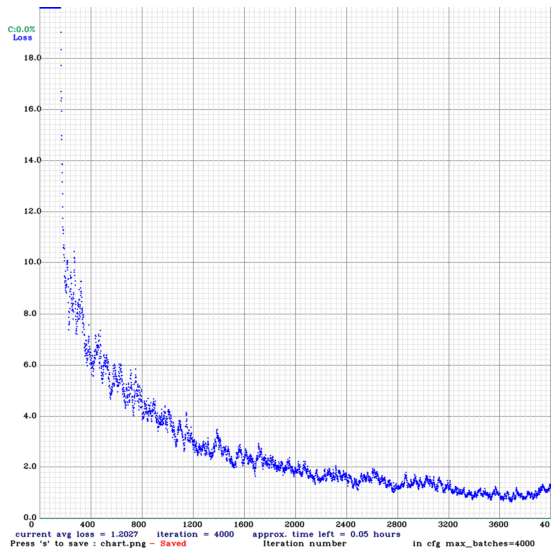

In [ ]:
imShow('chart_yolov4-custom.png')

In [ ]:
# !./darknet detector demo data/obj.data cfg/yolov4-custom.cfg backup/yolov4-custom_last.weights data/farm_test/test.mp4 -thresh 0.6